In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
train_data = pd.read_csv('train.csv', index_col=0)

In [50]:
train_data

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,,,,,,,,,,,,,,,,,,,,
842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3


In [51]:
test_data = pd.read_csv('test.csv', index_col=0)

In [52]:
test_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0


In [53]:
# Concatenate train and test data
concat_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)


In [54]:
concat_data

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,battery_power
0,0,2.2,0,1,0,7,0.6,188,2,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1,0.5,1,0,1,53,0.7,136,3,6,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,1,0.5,1,2,1,41,0.9,145,5,6,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,1,2.5,0,0,0,10,0.8,131,6,9,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1,1.2,0,13,1,44,0.6,141,2,14,...,1212,1411,8,2,15,1,1,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,1.9,0,0,1,54,0.5,170,7,17,...,913,2121,14,8,15,1,1,0,NaN,1700.0
2996,0,1.8,1,0,0,13,0.9,186,4,2,...,1632,1933,8,1,19,0,1,1,NaN,609.0
2997,0,1.4,0,1,1,8,0.5,80,1,12,...,825,1223,5,0,14,1,0,0,NaN,1185.0
2998,1,0.5,1,0,0,50,0.4,171,2,12,...,832,2509,15,11,6,0,1,0,NaN,1533.0


In [55]:
concat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   blue           3000 non-null   int64  
 1   clock_speed    3000 non-null   float64
 2   dual_sim       3000 non-null   int64  
 3   fc             3000 non-null   int64  
 4   four_g         3000 non-null   int64  
 5   int_memory     3000 non-null   int64  
 6   m_dep          3000 non-null   float64
 7   mobile_wt      3000 non-null   int64  
 8   n_cores        3000 non-null   int64  
 9   pc             3000 non-null   int64  
 10  px_height      3000 non-null   int64  
 11  px_width       3000 non-null   int64  
 12  ram            3000 non-null   int64  
 13  sc_h           3000 non-null   int64  
 14  sc_w           3000 non-null   int64  
 15  talk_time      3000 non-null   int64  
 16  three_g        3000 non-null   int64  
 17  touch_screen   3000 non-null   int64  
 18  wifi    

In [56]:
concat_data.shape

(3000, 21)

In [104]:
concat_data.isna().sum()

blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
battery_power    2000
dtype: int64

Exploratory Data Analysis

<ipython-input-105-e6c115be7cc0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concat_data['price_range'])


<Axes: xlabel='price_range', ylabel='Density'>

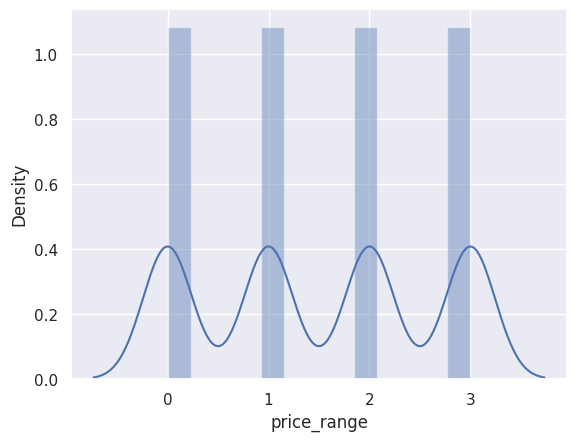

In [105]:
sns.distplot(concat_data['price_range'])

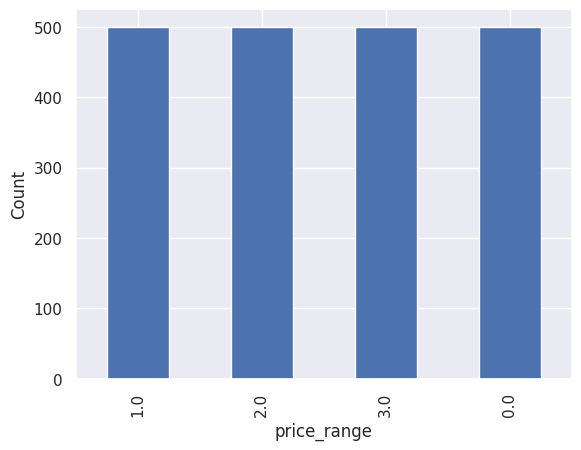

In [106]:

#classes
sns.set()
price_plot=concat_data['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

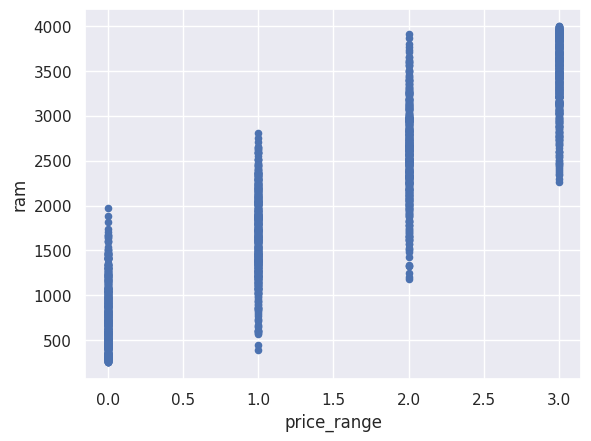

In [118]:
## RAM
concat_data.plot(x='price_range',y='ram',kind='scatter')
plt.show()

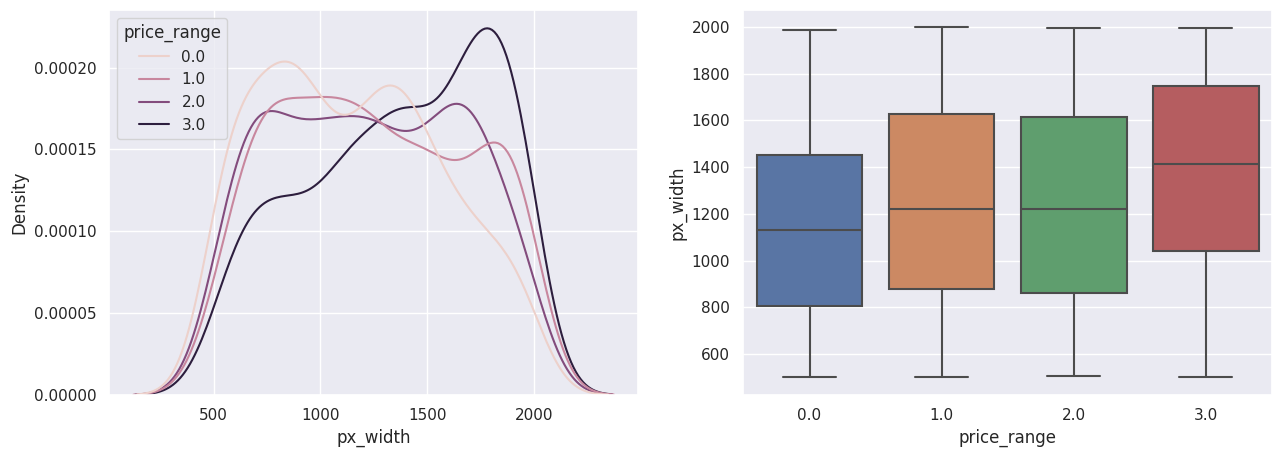

In [107]:
## pixel_width
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=concat_data, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=concat_data, x='price_range', y='px_width', ax=axs[1])
plt.show()

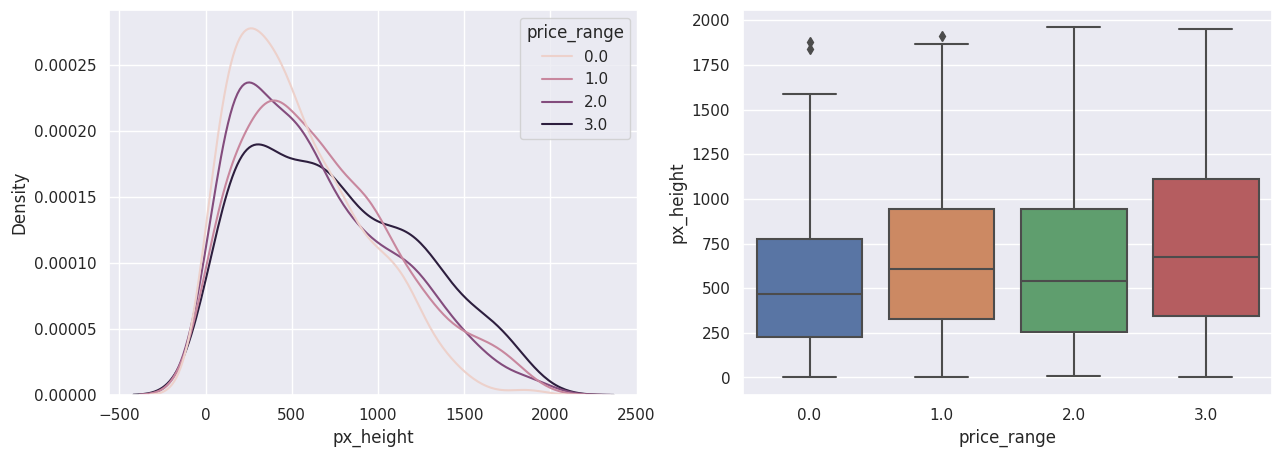

In [108]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=concat_data, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=concat_data, x='price_range', y='px_height', ax=axs[1])
plt.show()

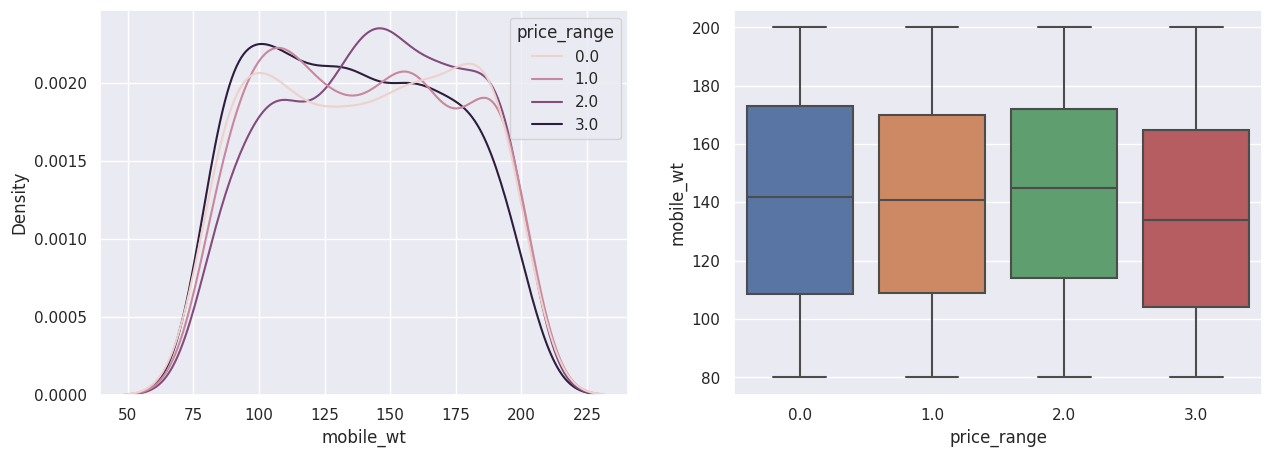

In [117]:
##  mobile weight
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=concat_data, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=concat_data, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()


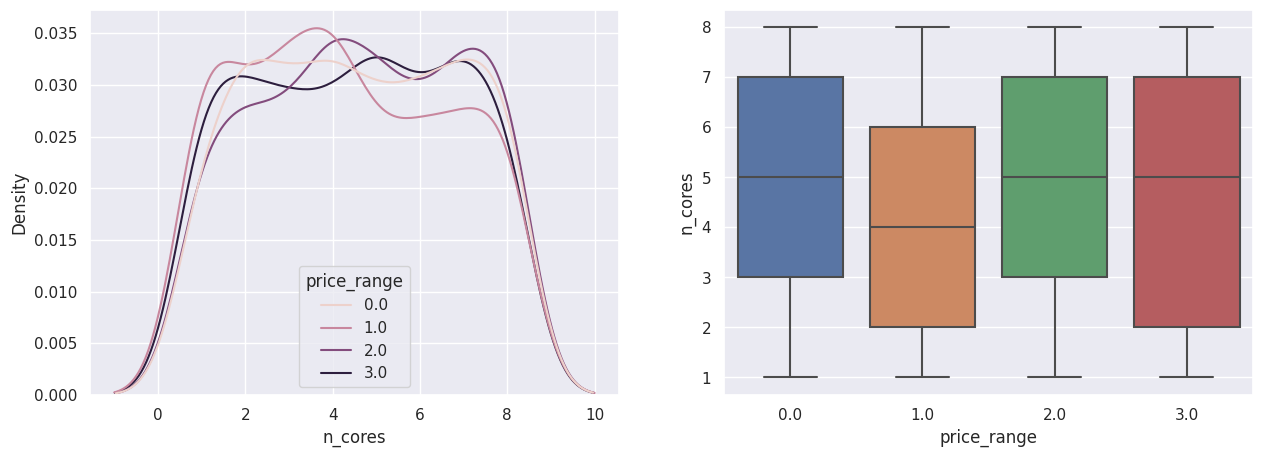

In [119]:
## PC (Primary camera Megapixels)
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=concat_data, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=concat_data, x='price_range', y='n_cores', ax=axs[1])
plt.show()

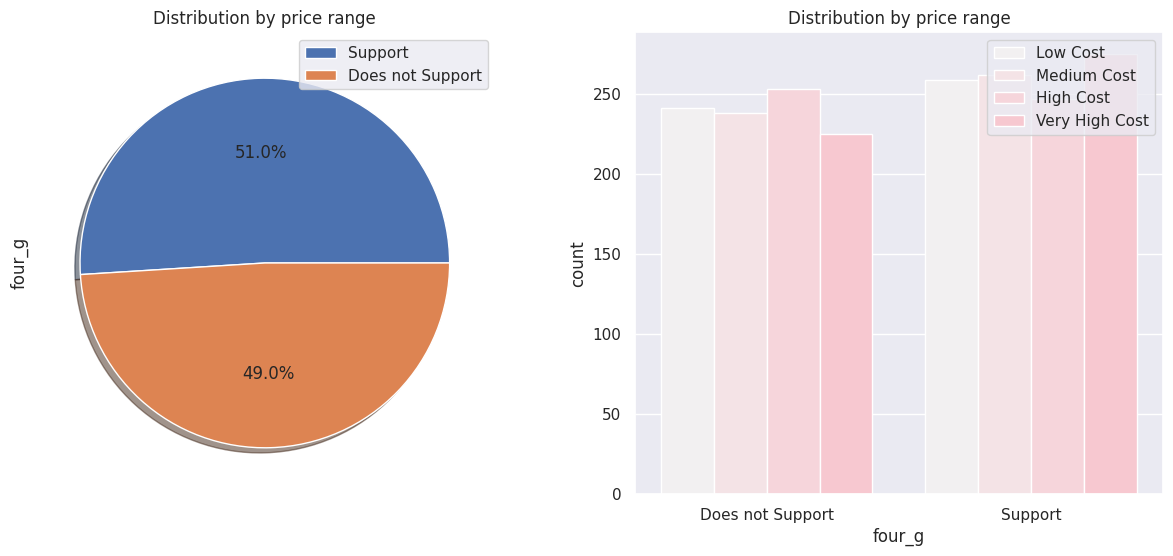

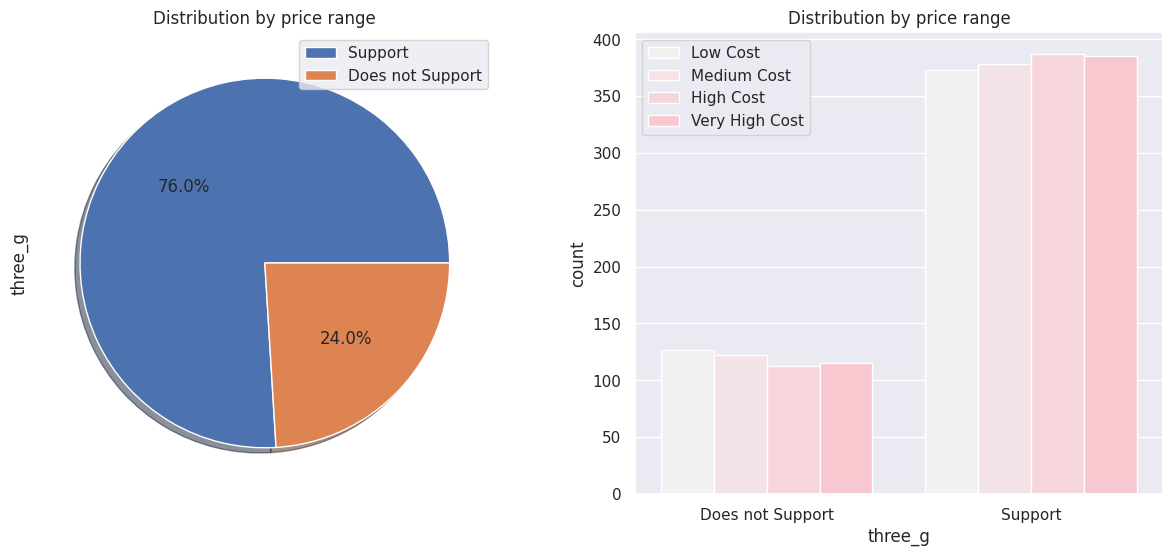

In [116]:
## feature '3G' play an important feature in prediction

binary_features = [ 'four_g', 'three_g']
for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  concat_data[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = concat_data, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

In [59]:
import seaborn as sns

<Axes: >

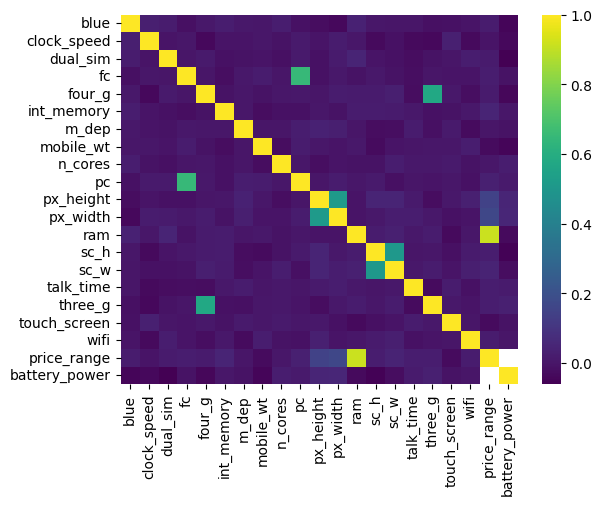

In [60]:
sns.heatmap(concat_data.corr(), cmap = 'viridis')

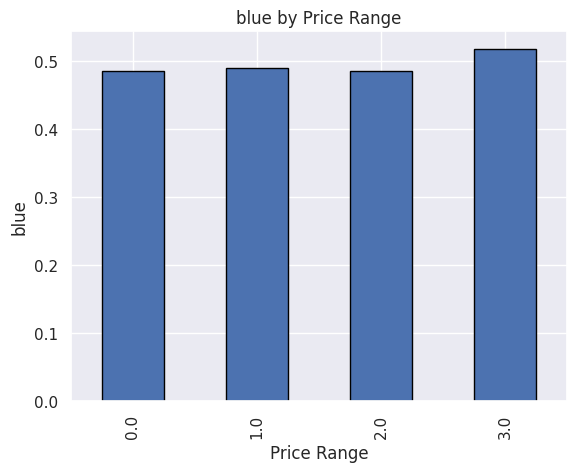

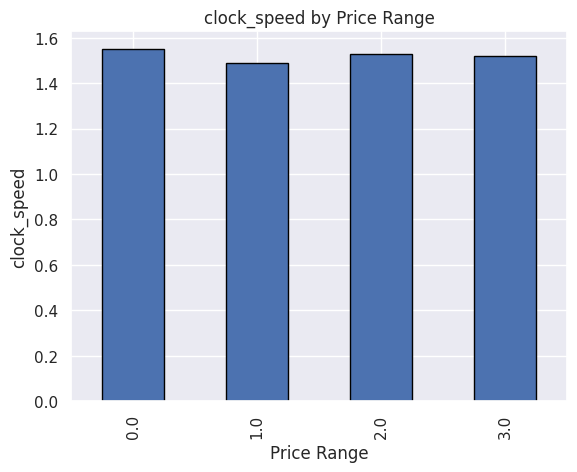

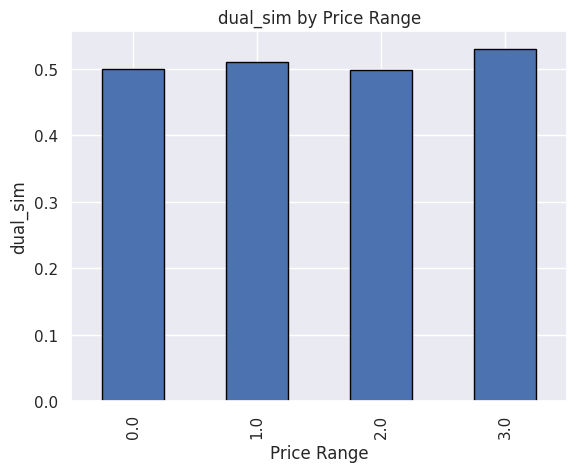

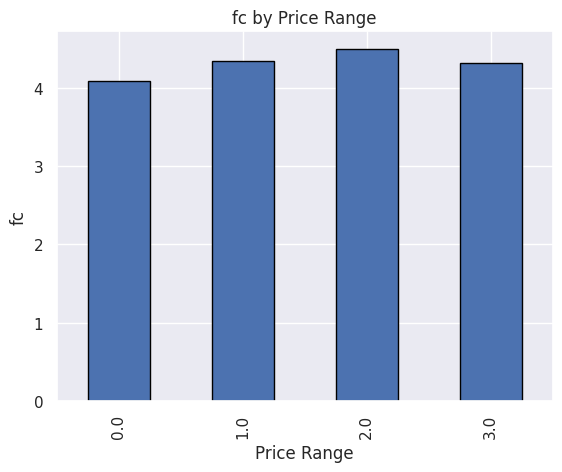

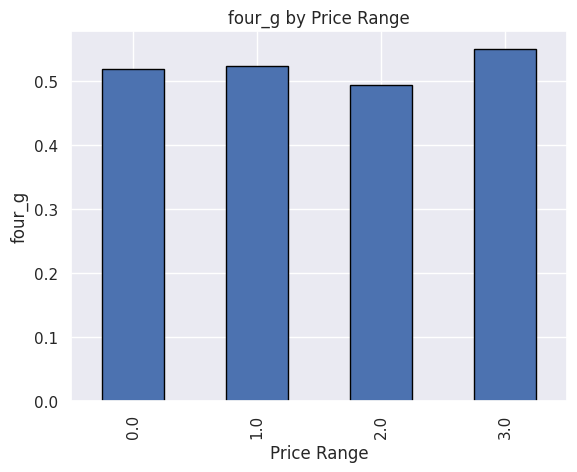

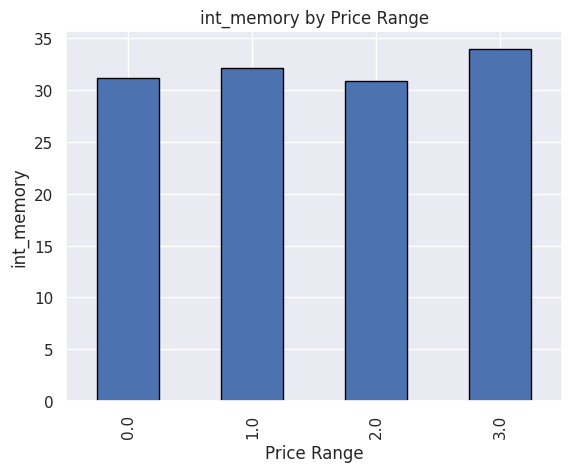

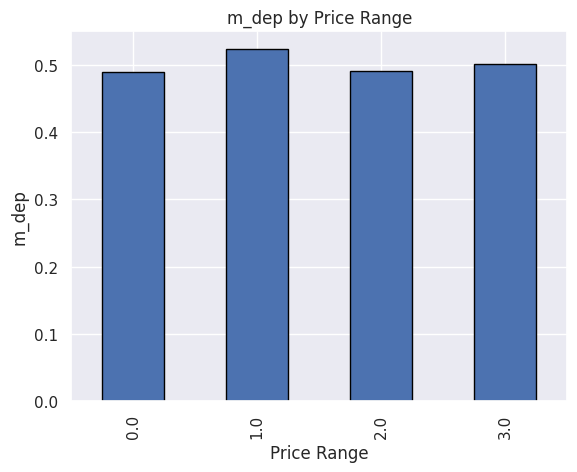

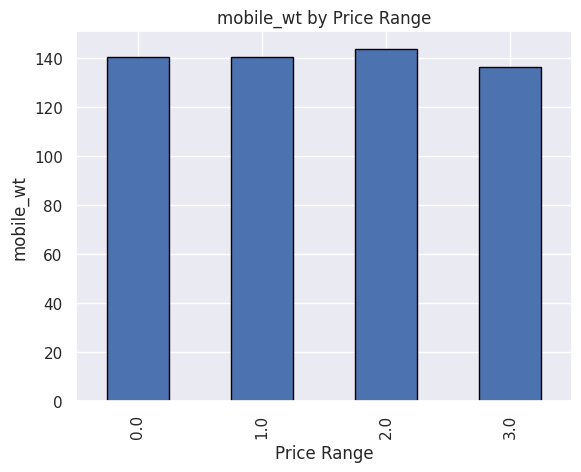

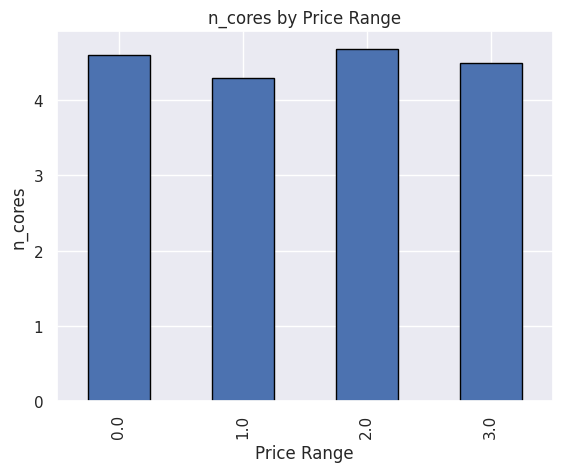

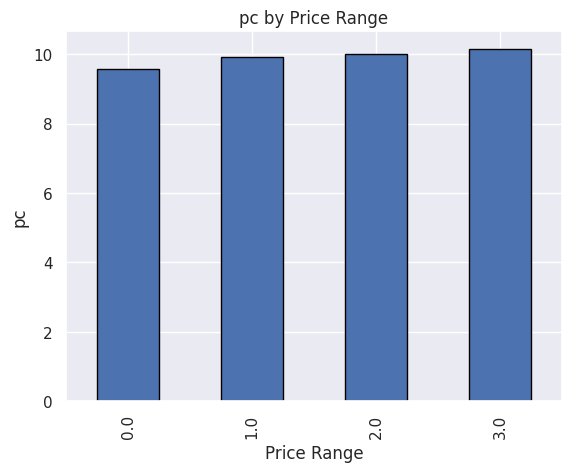

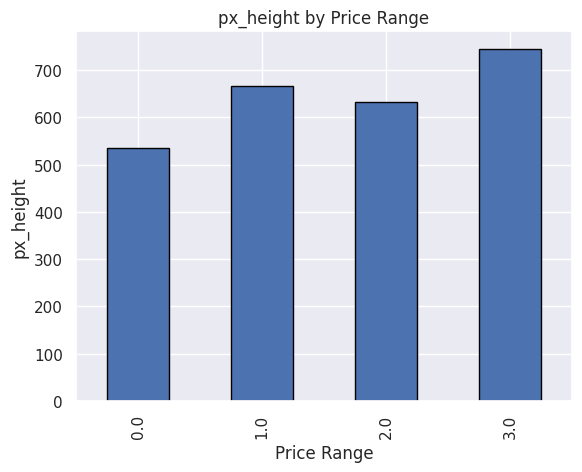

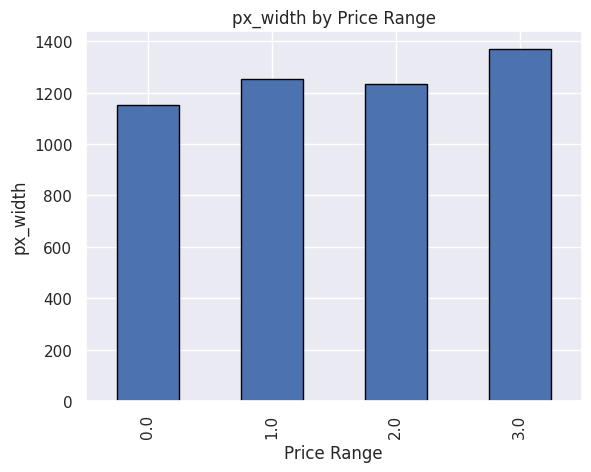

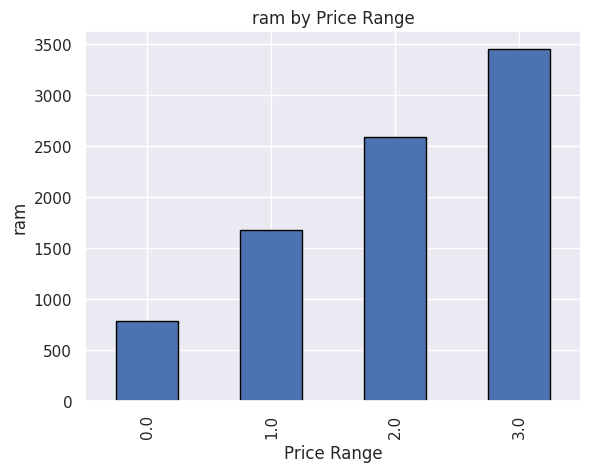

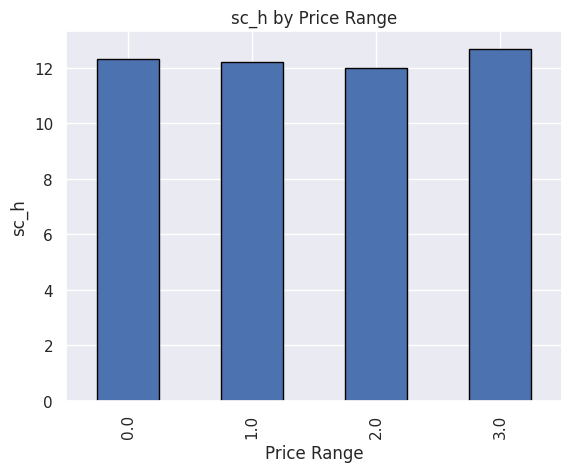

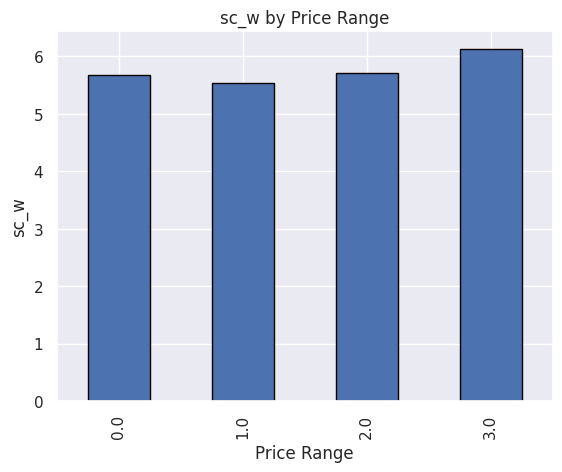

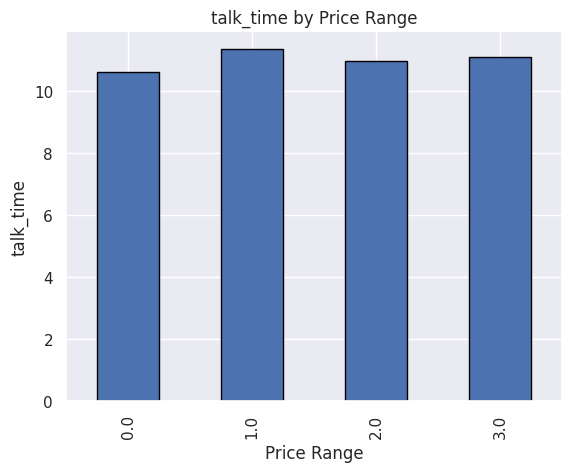

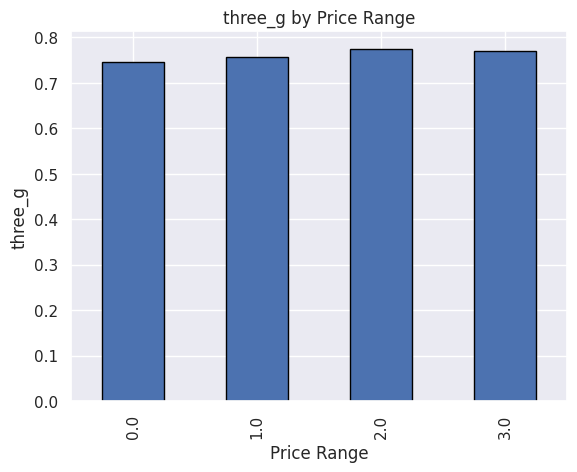

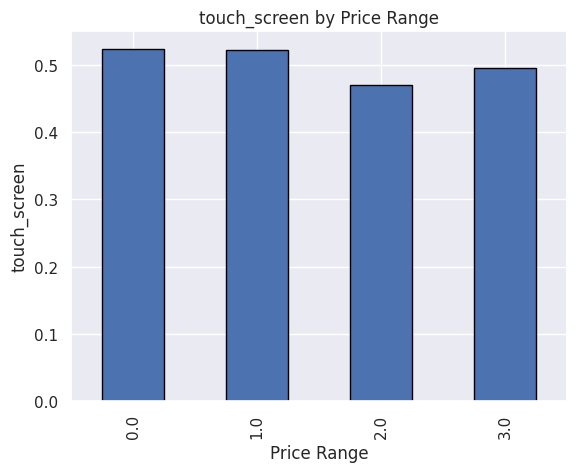

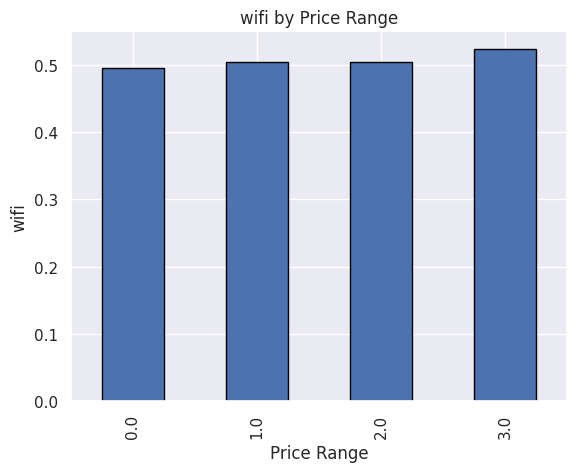

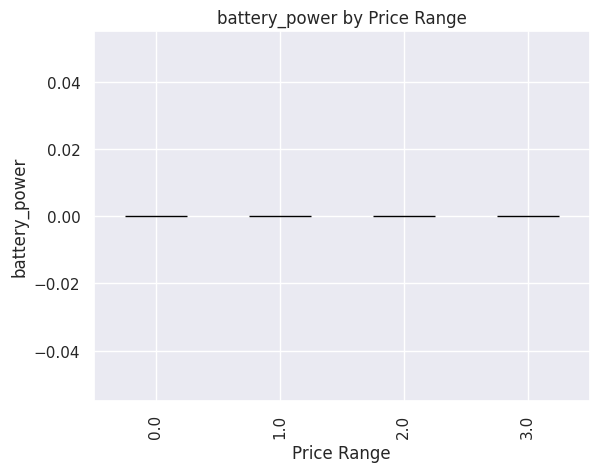

In [115]:
# Extract the columns except 'Price Range'
columns = concat_data.columns.drop('price_range')

# Iterate over the columns and create bar plots
for column in columns:
    # Group the data by the column and calculate the mean price range
    grouped_data = concat_data.groupby('price_range')[column].mean()

    # Create a bar plot
    plt.figure()
    grouped_data.plot(kind='bar', edgecolor='black')

    # Set the title and labels
    plt.title(f'{column} by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel(column)

# Display the bar plots
plt.show()

In [62]:
train = pd.read_csv('train.csv')

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [64]:
train.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [65]:
### even though most data is numerical still htere are values that can be categorical

In [66]:
train.n_cores.nunique()

8

In [100]:
cat = [i for i in train.columns if i!='price_range' and train[i].nunique()<20]
print(cat)

['blue', 'dual_sim', 'four_g', 'm_dep', 'n_cores', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [68]:
num = [columns for columns in train if columns not in cat]
print(num)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'price_range']


In [69]:
from sklearn.compose import make_column_transformer

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
ohe = OneHotEncoder()

In [73]:
X = train.drop('price_range', axis=1)
y = train.price_range

In [92]:
ct = make_column_transformer( (ohe, cat),remainder='passthrough')

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
lr = LogisticRegression()

In [95]:
lr.fit(ct.fit_transform(X), y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=50)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy)
print('Confusion matrix for Lr\n',cm)

Accuracy: 0.612
Confusion matrix for Lr
 [[115  37   3   0]
 [ 30  74  36  11]
 [  0  35  71  43]
 [  0   2  36 107]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


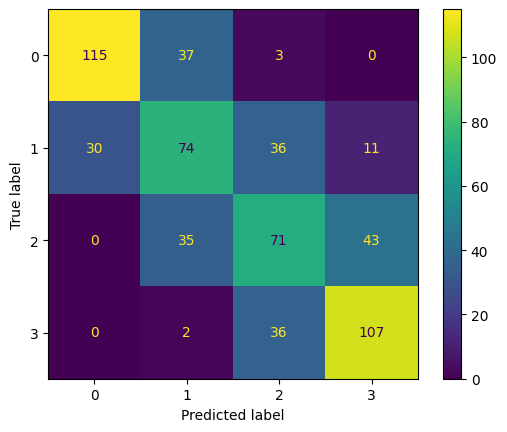

In [98]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()